## K-Nearest Neighbors

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Functions to calculate TPR and FPR

In [69]:
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

In [70]:
SMdata = pd.read_csv('SMData.csv')
SMdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Unnamed: 0                                                13198 non-null  int64  
 1    Debt ratio %                                             13198 non-null  float64
 2    Borrowing dependency                                     13198 non-null  float64
 3    Liability to Equity                                      13198 non-null  float64
 4    Net Income to Stockholder's Equity                       13198 non-null  float64
 5    Persistent EPS in the Last Four Seasons                  13198 non-null  float64
 6    ROA(C) before interest and depreciation before interest  13198 non-null  float64
 7    Net worth/Assets                                         13198 non-null  float64
 8    ROA(B) before i

In [71]:
x = SMdata.drop(columns = ["Bankrupt?"])
y = pd.DataFrame(SMdata["Bankrupt?"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

>.values will give the values in a numpy array (shape: (n,1)) <br>
>.ravel will convert that array shape to (n, ) (i.e. flatten it) <br>
By calling ravel() on values, the array is flattened into a 1D array.

In [72]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train.values.ravel())

y_pred = classifier.predict(x_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1999
           1       1.00      0.97      0.99      1961

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



KNN Classifier Confusion Matrix
Classification Accuracy:  0.9863636363636363
TPR:  0.9724630290668026
FPR:  0.0


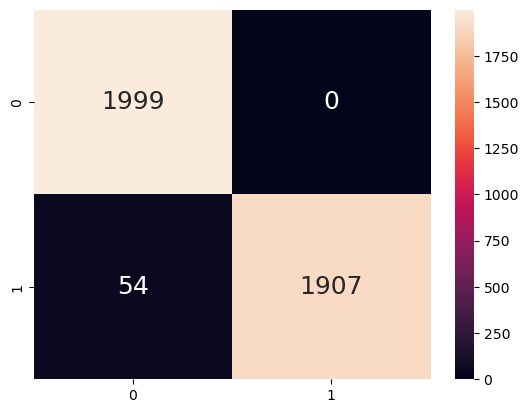

In [74]:
print("KNN Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18})

print("Classification Accuracy: ", classifier.score(x_test, y_test))
print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))

#### Calculating error for K values between 1 and 40

Text(0, 0.5, 'Mean Error')

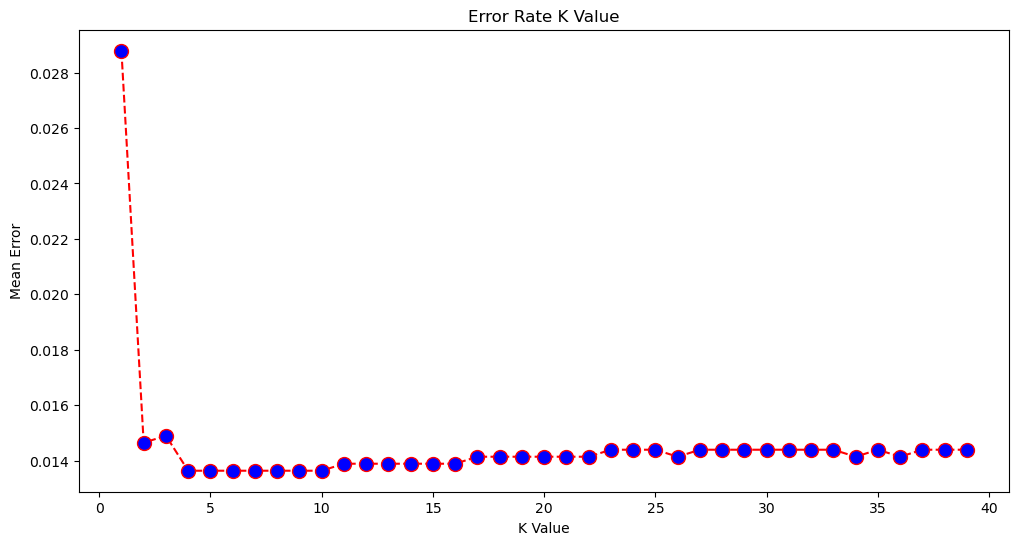

In [75]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values.ravel())
    pred_i = knn.predict(x_test)
    pred_i=pred_i.reshape(3960,1)
    error.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')